In [2]:
import os, numpy as np

In [3]:
e2e_logs_dir = '/mydata/rbachkaniwala3/code/e2e_time_logs'
single_image_transforms = {}
batch_stats = {}
dir = os.listdir(e2e_logs_dir)
dir.sort()

In [4]:
print(dir)

['b128_gpu4_100MBeach_jemalloc.log', 'b128_gpu4_100MBeach_malloc.log', 'b128_gpu4_100MBeach_numanode0.log', 'b128_gpu4_100MBeach_numanode1.log', 'b128_gpu4_100MBeach_tcmalloc.log', 'b128_gpu4_10MBeach_jemalloc.log', 'b128_gpu4_10MBeach_malloc.log', 'b128_gpu4_10MBeach_numanode0.log', 'b128_gpu4_10MBeach_numanode1.log', 'b128_gpu4_10MBeach_tcmalloc.log', 'b128_gpu4_1MBeach_jemalloc.log', 'b128_gpu4_1MBeach_malloc.log', 'b128_gpu4_1MBeach_numanode0.log', 'b128_gpu4_1MBeach_numanode1.log', 'b128_gpu4_1MBeach_tcmalloc.log', 'e2e_time.log']


In [5]:
# remove "e2e_time.log" from the list using the value
# of the index returned by the index() function

dir.pop(dir.index('e2e_time.log'))


'e2e_time.log'

In [6]:
for file in dir:
    single_image_transforms[file] = {}
    batch_stats[file] = {}
    full_file_path = os.path.join(e2e_logs_dir, file)
    # open file
    with open(full_file_path, "r") as f:
        # read file by line
        for line in f.readlines():
            split_line = line.split(" ")
            # if line starts with "Transform"
            if split_line[0] == "Transform":
                # t is the transform
                t = split_line[1][:-1]
                # time in nanosecs
                time = int(split_line[2])

                if t not in single_image_transforms[file]:
                    single_image_transforms[file][t] = [time]
                else:
                    # repeated transforms means no further unique transforms will be seen
                    single_image_transforms[file][t].append(time)
            elif line.startswith("Single image"):
                loader_or_transform = split_line[2]
                # time in nanosecs
                time = int(split_line[4])

                if loader_or_transform not in single_image_transforms[file]:
                    single_image_transforms[file][loader_or_transform] = [time]
                else:
                    # repeated transforms means no further unique transforms will be seen
                    single_image_transforms[file][loader_or_transform].append(time)
            elif line.startswith("All transform batch time"):
                batch_transform_time = int(split_line[4])
                
                if "batch_transform_time" not in batch_stats[file]:
                    batch_stats[file]["batch_transform_time"] = [batch_transform_time]
                else:
                    batch_stats[file]["batch_transform_time"].append(batch_transform_time)
            elif line.startswith("Collation time"):
                batch_collation_time = int(split_line[1].split(":")[1])

                if "batch_collation_time" not in batch_stats[file]:
                    batch_stats[file]["batch_collation_time"] = [batch_collation_time]
                else:
                    batch_stats[file]["batch_collation_time"].append(batch_collation_time)

print(single_image_transforms)
print(batch_stats)

{'b128_gpu4_100MBeach_jemalloc.log': {'RandomResizedCrop': [1436861437, 2479207720, 2655662547, 1037603312, 2069213629, 2596477189, 459837285, 1592139020, 2254837887, 2643640443, 1316526614, 1667404591, 1124568313, 2482049718, 1299476932, 1443608912, 1283031878, 1584794425, 2181606077, 813957694, 3255393669, 3223459647, 363892132, 1248811705, 2292121837, 2659271305, 3205548004, 567907725, 557747530, 751392952, 3002355313, 1448776179, 1545179150, 532809716, 535071691, 1171243726, 1711775416, 743326408, 790431520, 1997205648, 1258851559, 424947693, 672429007, 2292471126, 1167083734, 3050204067, 2403047875, 2536472854, 2251965599, 3065555691, 1731886651, 2831959993, 1682456774, 1601875395, 1933640932, 952155979, 2738201793, 2066999899, 1901632467, 2296973779, 634691221, 586476846, 2046022089, 2798095945, 1909099838, 1360920064, 2258652324, 1315500876, 1146423692, 1946257657, 3130934367, 2560425885, 802385217, 2471456042, 933875130, 953685960, 1003784982, 2161944920, 750616514, 596522412, 

In [7]:
def remove_outliers(data, threshold):
    # Calculate the standard deviation
    std_dev = np.std(data)

    # Find the indices of elements exceeding the threshold
    outliers = np.where(np.abs(data - np.mean(data)) > threshold * std_dev)[0]

    # Remove the outliers
    cleaned_data = np.delete(data, outliers)

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data)) * 100

    return cleaned_data, outlier_percentage

for file in single_image_transforms:
    print(file)
    for t in single_image_transforms[file]:
        tmp = single_image_transforms[file][t]
        print(t)
        threshold = 1
        # divide all elements in tmp by 1000000 to get ms
        _,outlier_percentage = remove_outliers(tmp, threshold)
        print(f"Outlier percentage: {outlier_percentage}%")
        tmp = [x/1000000 for x in tmp]

        # print mean and std given tmp list
        print(f"Mean: {sum(tmp)/len(tmp)} ms")
        print(f"Std: {np.std(tmp)} ms")
    print("\n")

b128_gpu4_100MBeach_jemalloc.log
RandomResizedCrop
Outlier percentage: 39.013671875%
Mean: 1623.1544784790017 ms
Std: 817.4919173674563 ms
RandomHorizontalFlip
Outlier percentage: 0.29296875%
Mean: 0.22297540966796903 ms
Std: 0.34199765713696983 ms
ToTensor
Outlier percentage: 26.611328125%
Mean: 0.6868656708984368 ms
Std: 0.14633606309619396 ms
Normalize
Outlier percentage: 7.8125%
Mean: 0.2707652075195314 ms
Std: 0.02892577075633507 ms
loader
Outlier percentage: 15.771484375%
Mean: 10307.474556634792 ms
Std: 118.33491865055454 ms
transform
Outlier percentage: 39.0625%
Mean: 1753.4886001679654 ms
Std: 818.2467133720723 ms


b128_gpu4_100MBeach_malloc.log
RandomResizedCrop
Outlier percentage: 38.232421875%
Mean: 1135.0453208012696 ms
Std: 554.3783947718695 ms
RandomHorizontalFlip
Outlier percentage: 0.09765625%
Mean: 0.18400772949218713 ms
Std: 0.5010203139291861 ms
ToTensor
Outlier percentage: 16.89453125%
Mean: 0.5406032436523436 ms
Std: 0.10328187410394693 ms
Normalize
Outlier perce

In [8]:
def remove_outliers(data, threshold):
    # Calculate the standard deviation
    std_dev = np.std(data)

    # Find the indices of elements exceeding the threshold
    outliers = np.where(np.abs(data - np.mean(data)) > threshold * std_dev)[0]

    # Remove the outliers
    cleaned_data = np.delete(data, outliers)

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data)) * 100

    return cleaned_data, outlier_percentage

for file in batch_stats:
    print(file)
    for t in batch_stats[file]:
        tmp = batch_stats[file][t]
        print(t)
        threshold = 1
        # divide all elements in tmp by 1000000 to get ms
        _,outlier_percentage = remove_outliers(tmp, threshold)
        print(f"Outlier percentage: {outlier_percentage}%")
        tmp = [x/1000000 for x in tmp]

        # print mean and std given tmp list
        print(f"Mean: {sum(tmp)/len(tmp)} ms")
        print(f"Std: {np.std(tmp)} ms")
    print("\n")

b128_gpu4_100MBeach_jemalloc.log
batch_transform_time
Outlier percentage: 31.25%
Mean: 1543826.8692392502 ms
Std: 17918.77083150004 ms
batch_collation_time
Outlier percentage: 25.0%
Mean: 63.046241187499994 ms
Std: 7.465499802398415 ms


b128_gpu4_100MBeach_malloc.log
batch_transform_time
Outlier percentage: 18.75%
Mean: 1483032.5383860625 ms
Std: 8740.469828586454 ms
batch_collation_time
Outlier percentage: 18.75%
Mean: 64.33092125 ms
Std: 6.921356323070884 ms


b128_gpu4_100MBeach_numanode0.log
batch_transform_time
Outlier percentage: 25.0%
Mean: 1460268.3345400626 ms
Std: 6603.817812606368 ms
batch_collation_time
Outlier percentage: 31.25%
Mean: 50.23654106250001 ms
Std: 0.4962539686783963 ms


b128_gpu4_100MBeach_numanode1.log
batch_transform_time
Outlier percentage: 37.5%
Mean: 1470383.821448875 ms
Std: 6630.180498050135 ms
batch_collation_time
Outlier percentage: 43.75%
Mean: 50.2973021875 ms
Std: 0.35927191672155157 ms


b128_gpu4_100MBeach_tcmalloc.log
batch_transform_time
Outl

In [9]:
transforms_for_df_elapsed_time = {}
transforms_for_df_elapsed_time_std_dev = {}
operators = []

for file in single_image_transforms:
    for op in single_image_transforms[file]:
        if op not in operators:
            operators.append(op)
    # since all files have the same operators, we can break  
    break

for op in operators:
    for file in single_image_transforms:
        f_size = file.split("_")[2].split("e")[0]
        mem_allocator = file.split("_")[3].split(".")[0]
        file_name = f_size + "_" + mem_allocator
        elapsed_times = single_image_transforms[file][op]
        # std dev of elapsed times
        if file_name in transforms_for_df_elapsed_time:
            transforms_for_df_elapsed_time_std_dev[f_size + "_" + mem_allocator].append(np.std(elapsed_times)/1000000)
        else:
            transforms_for_df_elapsed_time_std_dev[f_size + "_" + mem_allocator] = [np.std(elapsed_times)/1000000]
        
        elapsed_times = sum(elapsed_times)/len(elapsed_times)/1000000 # in ms

        if file_name in transforms_for_df_elapsed_time:
            transforms_for_df_elapsed_time[f_size + "_" + mem_allocator].append(elapsed_times)
        else:
            transforms_for_df_elapsed_time[f_size + "_" + mem_allocator] = [elapsed_times]
    

In [10]:
print(transforms_for_df_elapsed_time)

{'100MB_jemalloc': [1623.154478479004, 0.22297540966796875, 0.6868656708984375, 0.27076520751953126, 10307.474556634766, 1753.4886001679688], '100MB_malloc': [1135.0453208012696, 0.1840077294921875, 0.5406032436523438, 0.2888198432617187, 10186.357150612304, 1399.6641107993164], '100MB_numanode0': [1080.5012666787109, 0.200382353515625, 0.523175814453125, 0.28087743994140624, 10084.744989760255, 1323.409105696289], '100MB_numanode1': [1102.8942102524413, 0.16320580810546875, 0.485253861328125, 0.2700773657226562, 10123.384344520997, 1363.8334480908204], '100MB_tcmalloc': [1143.5114902407227, 0.20849501123046876, 0.8857718432617188, 0.317629474609375, 8675.318855052246, 1145.6659092294922], '10MB_jemalloc': [611.497359847168, 0.185144625, 0.66192500390625, 0.2660734609375, 7376.029940974121, 734.9474635268555], '10MB_malloc': [408.85675825878906, 0.16512172509765624, 0.5268551455078125, 0.2823716215820313, 7216.1879695424805, 647.0920007060547], '10MB_numanode0': [406.6983596137695, 0.1

In [11]:
print(transforms_for_df_elapsed_time_std_dev)

{'100MB_jemalloc': [817.4919173674562, 0.34199765713696983, 0.14633606309619396, 0.028925770756335067, 118.33491865055456, 818.2467133720723], '100MB_malloc': [554.3783947718696, 0.5010203139291861, 0.10328187410394692, 0.05418751738277676, 100.037988986073, 554.3516377060104], '100MB_numanode0': [552.5033295773807, 0.03904385890582333, 0.05694371672171355, 0.026595956644575557, 35.50041796867727, 552.8532530614597], '100MB_numanode1': [539.2508757352426, 0.04797288112453191, 0.035032284761609044, 0.03055450635610995, 44.543382043402076, 539.2971284380491], '100MB_tcmalloc': [549.7911970409708, 0.06325401275773293, 0.22786033350126342, 0.11218569426592272, 261.3201351917252, 549.7859184918041], '10MB_jemalloc': [174.19299643496447, 0.06407216930649863, 0.19380162875835583, 0.2014865201398663, 66.42006625194973, 174.13899003125408], '10MB_malloc': [117.74525913871229, 0.043778546922355985, 0.4291385739079139, 0.041263835743570024, 108.79082995947836, 118.55706626965441], '10MB_numanode0

In [12]:
batch_for_df_elapsed_time = {}
batch_for_df_elapsed_time_std_dev = {}
batch_breakdown = ['batch_collation_time', 'batch_transform_time']

for op in batch_breakdown:
    for file in batch_stats:
        f_size = file.split("_")[2].split("e")[0]
        mem_allocator = file.split("_")[3].split(".")[0]
        file_name = f_size + "_" + mem_allocator
        elapsed_times = batch_stats[file][op]
        # std dev of elapsed times
        if file_name in batch_for_df_elapsed_time:
            batch_for_df_elapsed_time_std_dev[f_size + "_" + mem_allocator].append(np.std(elapsed_times)/1000000)
        else:
            batch_for_df_elapsed_time_std_dev[f_size + "_" + mem_allocator] = [np.std(elapsed_times)/1000000]
        
        elapsed_times = sum(elapsed_times)/len(elapsed_times)/1000000 # in ms

        if file_name in batch_for_df_elapsed_time:
            batch_for_df_elapsed_time[f_size + "_" + mem_allocator].append(elapsed_times)
        else:
            batch_for_df_elapsed_time[f_size + "_" + mem_allocator] = [elapsed_times]
    

In [13]:
print(batch_for_df_elapsed_time)

{'100MB_jemalloc': [63.0462411875, 1543826.86923925], '100MB_malloc': [64.33092125, 1483032.5383860625], '100MB_numanode0': [50.2365410625, 1460268.3345400626], '100MB_numanode1': [50.2973021875, 1470383.821448875], '100MB_tcmalloc': [69.075680875, 1257094.8044338124], '10MB_jemalloc': [63.4543306875, 1038226.2832565625], '10MB_malloc': [63.9365649375, 1006521.2947840625], '10MB_numanode0': [50.0503121875, 1001410.5944840625], '10MB_numanode1': [50.1619908125, 1008924.9082260625], '10MB_tcmalloc': [73.6556281875, 810543.6633215625], '1MB_jemalloc': [60.2769001875, 121004.65937075], '1MB_malloc': [59.4995260625, 112836.252770375], '1MB_numanode0': [48.5452968125, 112068.0443770625], '1MB_numanode1': [50.0773059375, 113098.7945128125], '1MB_tcmalloc': [74.81571625, 90115.0138126875]}


In [14]:
print(batch_for_df_elapsed_time_std_dev)

{'100MB_jemalloc': [7.465499802398416, 17918.770831500064], '100MB_malloc': [6.921356323070885, 8740.46982858645], '100MB_numanode0': [0.49625396867839616, 6603.817812606375], '100MB_numanode1': [0.3592719167215514, 6630.180498050151], '100MB_tcmalloc': [14.857112528390816, 16081.125985628063], '10MB_jemalloc': [7.510515650558811, 2568.91803795935], '10MB_malloc': [7.089165597724649, 9083.133122917574], '10MB_numanode0': [0.30362865170081094, 3239.1650209909817], '10MB_numanode1': [0.34795331654085054, 3374.503503611701], '10MB_tcmalloc': [12.051375848068178, 23776.44677539259], '1MB_jemalloc': [6.340146750882123, 1319.3971717002348], '1MB_malloc': [6.481630231827218, 1924.1965646454046], '1MB_numanode0': [0.6279691774469527, 1383.751701120178], '1MB_numanode1': [0.28078880175486626, 1559.7478191267626], '1MB_tcmalloc': [15.203614928102635, 1617.1087892153273]}


In [15]:
import pandas as pd

In [16]:
single_image_df_elapsed_time = pd.DataFrame(transforms_for_df_elapsed_time, index=operators)
single_image_df_elapsed_time_std_dev = pd.DataFrame(transforms_for_df_elapsed_time_std_dev, index=operators)

In [17]:
single_image_df_elapsed_time.head()

,100MB_jemalloc,100MB_malloc,100MB_numanode0,100MB_numanode1,100MB_tcmalloc,10MB_jemalloc,10MB_malloc,10MB_numanode0,10MB_numanode1,10MB_tcmalloc,1MB_jemalloc,1MB_malloc,1MB_numanode0,1MB_numanode1,1MB_tcmalloc
RandomResizedCrop,1623.154478,1135.045321,1080.501267,1102.894210,1143.511490,611.497360,408.856758,406.698360,406.024508,426.373088,166.278107,116.588643,115.352088,116.058581,117.672589
RandomHorizontalFlip,0.222975,0.184008,0.200382,0.163206,0.208495,0.185145,0.165122,0.198498,0.161054,0.207916,0.201247,0.180367,0.197093,0.157886,0.200420
ToTensor,0.686866,0.540603,0.523176,0.485254,0.885772,0.661925,0.526855,0.513751,0.484475,0.916324,0.653620,0.527301,0.522551,0.487437,0.673980
Normalize,0.270765,0.288820,0.280877,0.270077,0.317629,0.266073,0.282372,0.289467,0.278934,0.321655,0.263467,0.289796,0.293245,0.281595,0.271844
loader,10307.474557,10186.357151,10084.744990,10123.384345,8675.318855,7376.029941,7216.187970,7175.448243,7216.678664,5902.958594,764.087597,738.509579,734.937686,739.361855,584.883729


In [18]:
single_image_df_elapsed_time_std_dev.head()

,100MB_jemalloc,100MB_malloc,100MB_numanode0,100MB_numanode1,100MB_tcmalloc,10MB_jemalloc,10MB_malloc,10MB_numanode0,10MB_numanode1,10MB_tcmalloc,1MB_jemalloc,1MB_malloc,1MB_numanode0,1MB_numanode1,1MB_tcmalloc
RandomResizedCrop,817.491917,554.378395,552.503330,539.250876,549.791197,174.192996,117.745259,113.862437,115.346978,122.869618,77.509160,54.126535,53.915186,52.243490,54.525494
RandomHorizontalFlip,0.341998,0.501020,0.039044,0.047973,0.063254,0.064072,0.043779,0.039018,0.040048,0.064211,0.230162,0.104589,0.039671,0.046172,0.059816
ToTensor,0.146336,0.103282,0.056944,0.035032,0.227860,0.193802,0.429139,0.040222,0.037313,0.271849,0.360578,0.093212,0.067752,0.077530,0.224575
Normalize,0.028926,0.054188,0.026596,0.030555,0.112186,0.201487,0.041264,0.026671,0.034194,0.105787,0.041665,0.042431,0.024971,0.031510,0.062604
loader,118.334919,100.037989,35.500418,44.543382,261.320135,66.420066,108.790830,46.793952,58.938771,320.957455,43.380050,35.457521,36.803184,36.425957,44.420521


In [19]:
batch_for_df = pd.DataFrame(batch_for_df_elapsed_time, index=batch_breakdown)
batch_for_df_std_dev = pd.DataFrame(batch_for_df_elapsed_time_std_dev, index=batch_breakdown)

In [20]:
batch_for_df.head()

,100MB_jemalloc,100MB_malloc,100MB_numanode0,100MB_numanode1,100MB_tcmalloc,10MB_jemalloc,10MB_malloc,10MB_numanode0,10MB_numanode1,10MB_tcmalloc,1MB_jemalloc,1MB_malloc,1MB_numanode0,1MB_numanode1,1MB_tcmalloc
batch_collation_time,6.304624e+01,6.433092e+01,5.023654e+01,5.029730e+01,6.907568e+01,6.345433e+01,6.393656e+01,5.005031e+01,5.016199e+01,73.655628,60.276900,59.499526,48.545297,50.077306,74.815716
batch_transform_time,1.543827e+06,1.483033e+06,1.460268e+06,1.470384e+06,1.257095e+06,1.038226e+06,1.006521e+06,1.001411e+06,1.008925e+06,810543.663322,121004.659371,112836.252770,112068.044377,113098.794513,90115.013813


In [21]:
batch_for_df_std_dev.head()

,100MB_jemalloc,100MB_malloc,100MB_numanode0,100MB_numanode1,100MB_tcmalloc,10MB_jemalloc,10MB_malloc,10MB_numanode0,10MB_numanode1,10MB_tcmalloc,1MB_jemalloc,1MB_malloc,1MB_numanode0,1MB_numanode1,1MB_tcmalloc
batch_collation_time,7.465500,6.921356,0.496254,0.359272,14.857113,7.510516,7.089166,0.303629,0.347953,12.051376,6.340147,6.481630,0.627969,0.280789,15.203615
batch_transform_time,17918.770832,8740.469829,6603.817813,6630.180498,16081.125986,2568.918038,9083.133123,3239.165021,3374.503504,23776.446775,1319.397172,1924.196565,1383.751701,1559.747819,1617.108789


In [22]:
# get rows of df_elapsed_time
rows = single_image_df_elapsed_time.index.values.tolist()
print(rows)
rows = batch_for_df.index.values.tolist()
print(rows)

['RandomResizedCrop', 'RandomHorizontalFlip', 'ToTensor', 'Normalize', 'loader', 'transform']
['batch_collation_time', 'batch_transform_time']


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
data = single_image_df_elapsed_time
sdev = single_image_df_elapsed_time_std_dev

In [25]:
std_dev_flag = False

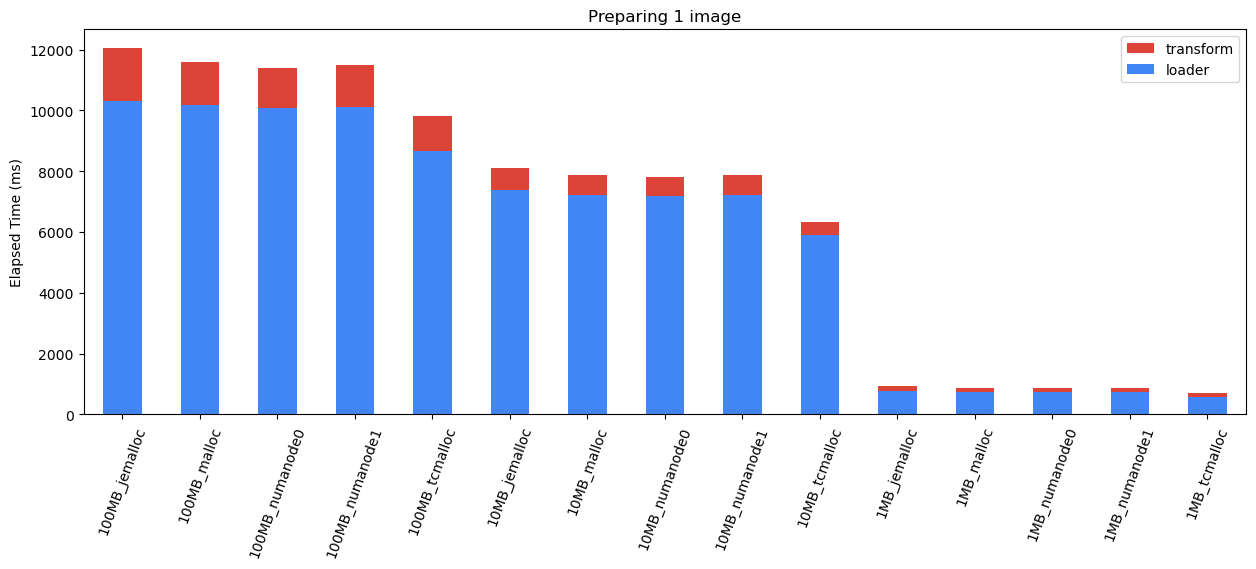

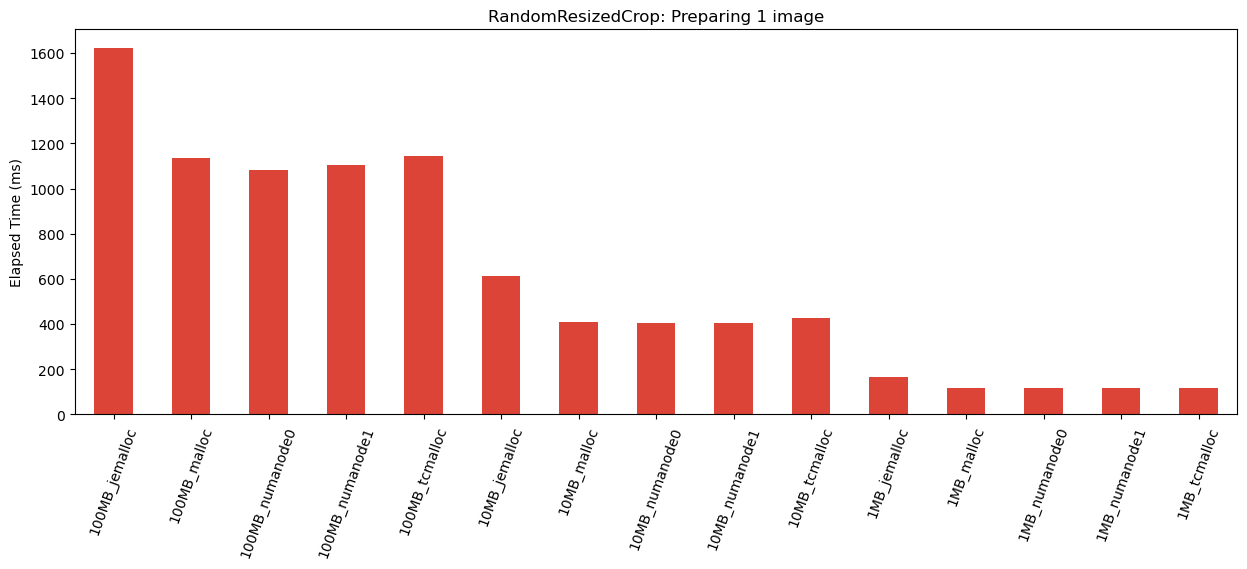

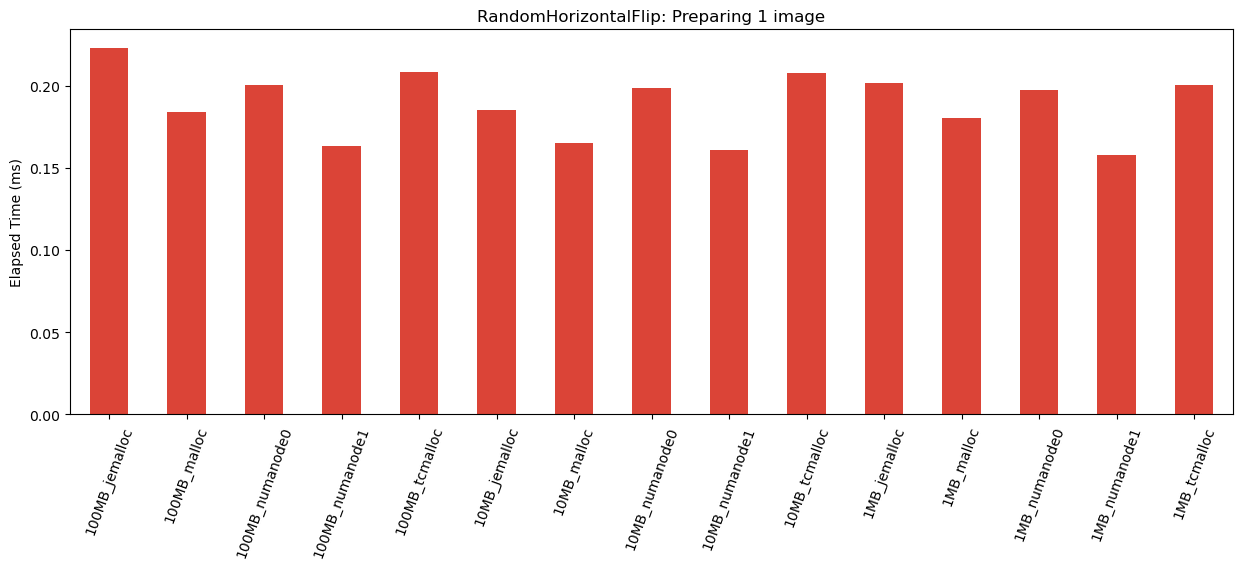

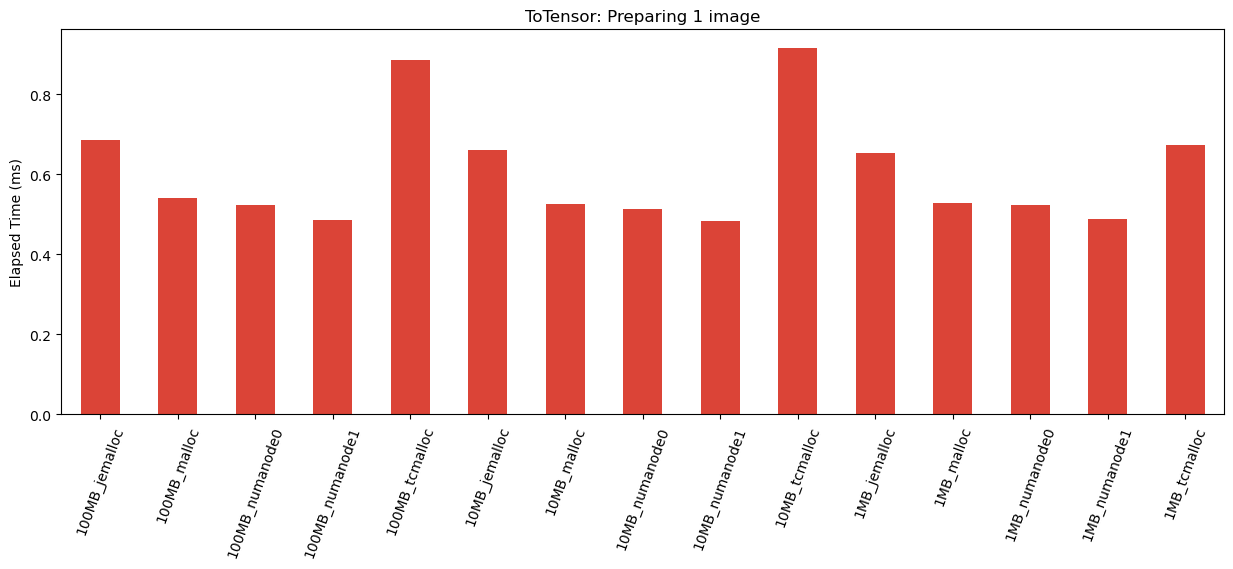

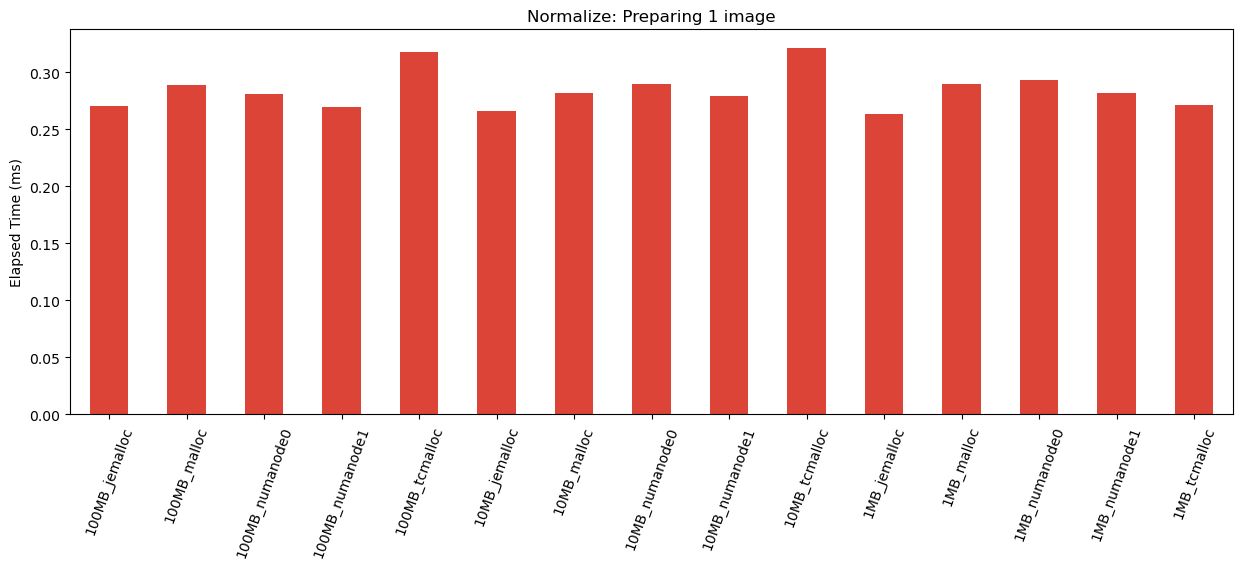

In [26]:
# stack 'loader' and 'transform' op with different colors
plt.figure(figsize=(15, 5))
data.loc['transform'].plot(kind='bar', color="#DB4437", bottom=data.loc['loader'])
data.loc['loader'].plot(kind='bar', color="#4285F4")
plt.xticks(rotation=70)
plt.ylabel("Elapsed Time (ms)")
plt.title(f"Preparing 1 image")
plt.legend(['transform', 'loader'])
plt.show()

for op in operators:
    # ignore if op is 'loader' or 'transform'
    if op == 'loader' or op == 'transform':
        continue
    plt.figure(figsize=(15, 5))
    data.loc[op].plot(kind='bar', yerr=sdev.loc[op] if std_dev_flag else None, color="#DB4437")
    plt.xticks(rotation=70)
    plt.title(f"{op}: Preparing 1 image")
    plt.ylabel("Elapsed Time (ms)")
    plt.show()


In [27]:
data = batch_for_df
sdev = batch_for_df_std_dev

In [28]:
std_dev_flag = True

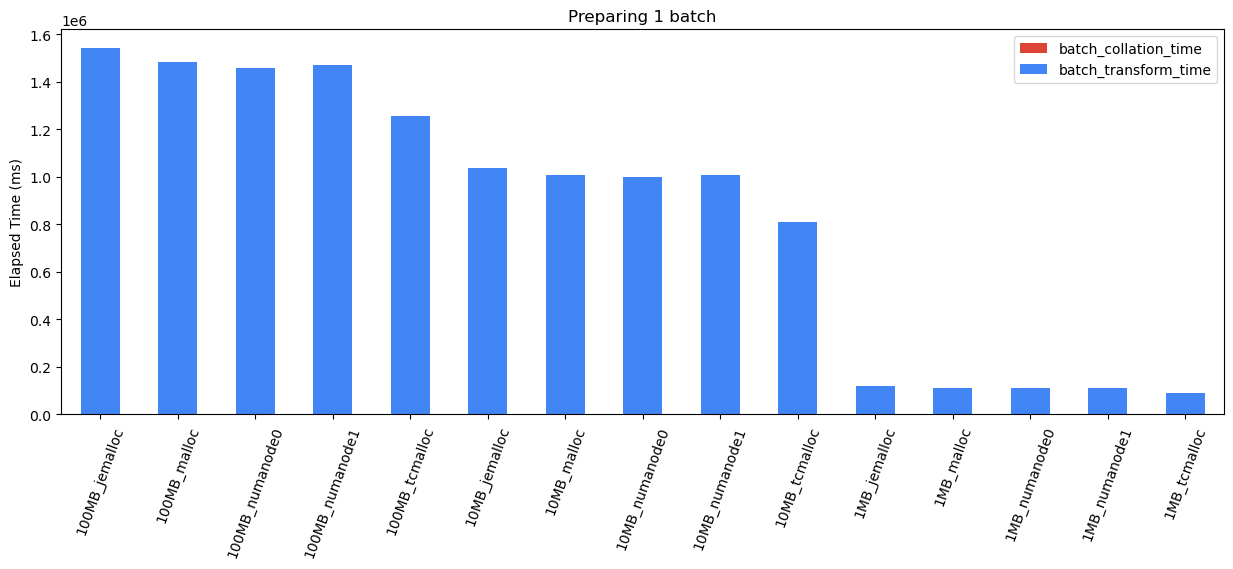

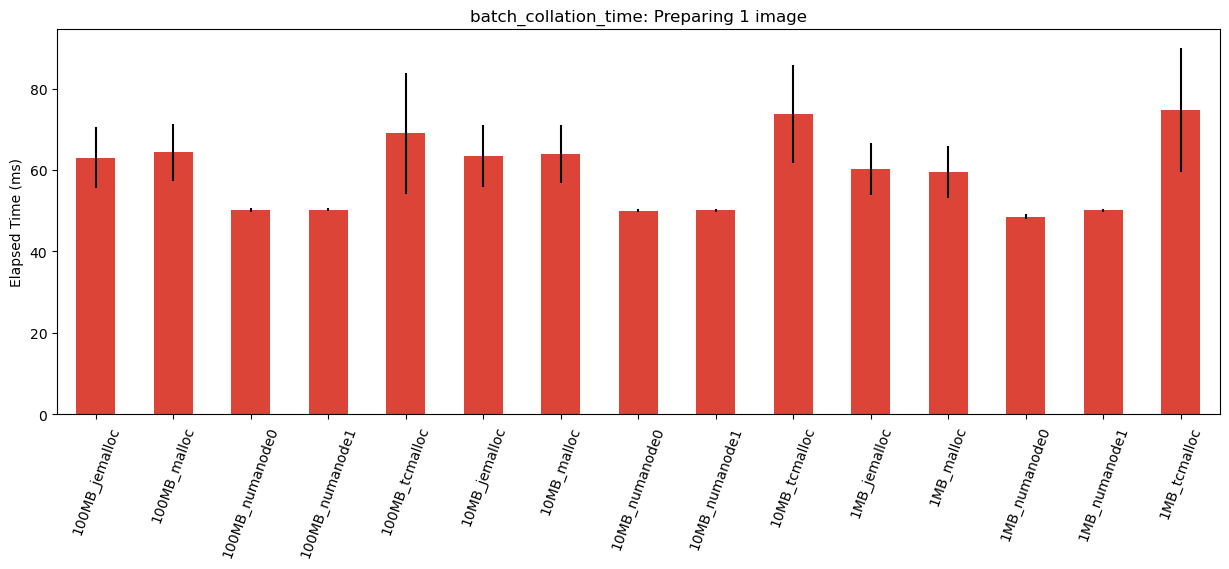

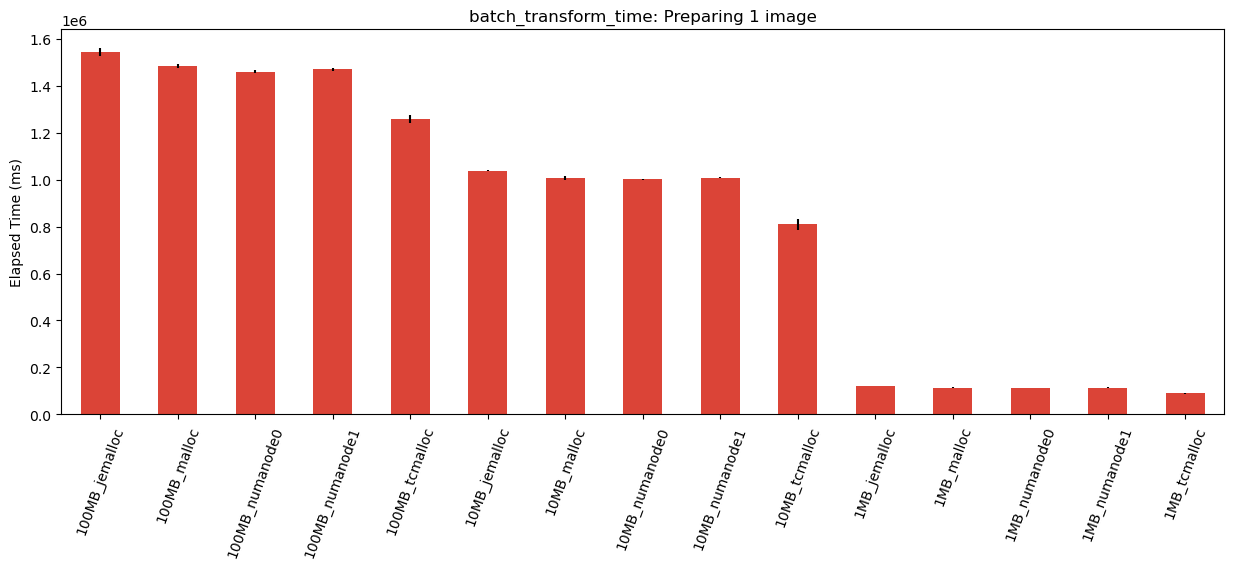

In [29]:
# stack 'loader' and 'transform' op with different colors
plt.figure(figsize=(15, 5))
data.loc['batch_collation_time'].plot(kind='bar', color="#DB4437", bottom=data.loc['batch_transform_time'])
data.loc['batch_transform_time'].plot(kind='bar', color="#4285F4")
plt.xticks(rotation=70)
plt.ylabel("Elapsed Time (ms)")
plt.title(f"Preparing 1 batch")
plt.legend(['batch_collation_time', 'batch_transform_time'])
plt.show()

for op in batch_breakdown:
    plt.figure(figsize=(15, 5))
    data.loc[op].plot(kind='bar', yerr=sdev.loc[op] if std_dev_flag else None, color="#DB4437")
    plt.xticks(rotation=70)
    plt.title(f"{op}: Preparing 1 image")
    plt.ylabel("Elapsed Time (ms)")
    plt.show()


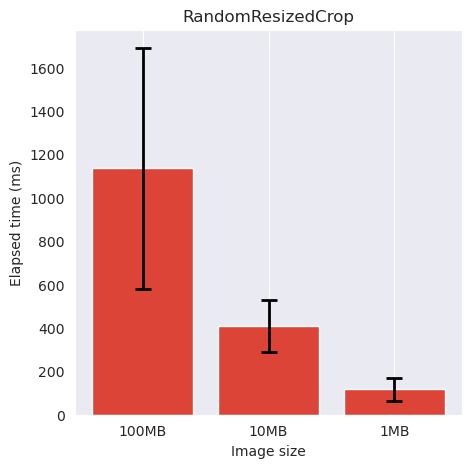

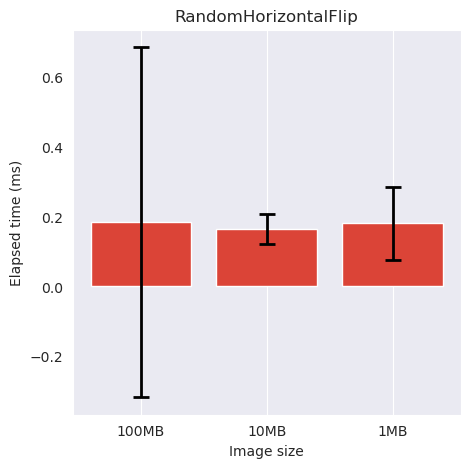

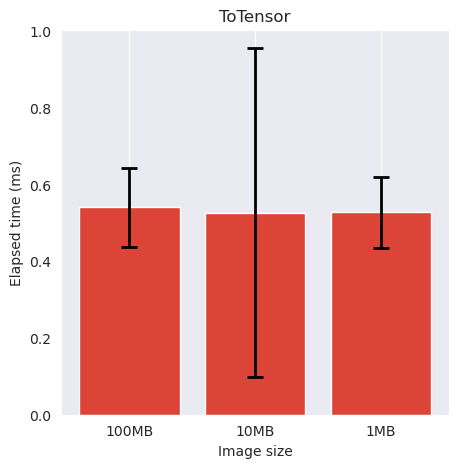

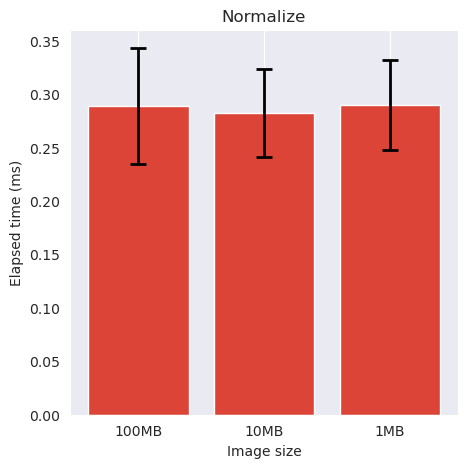

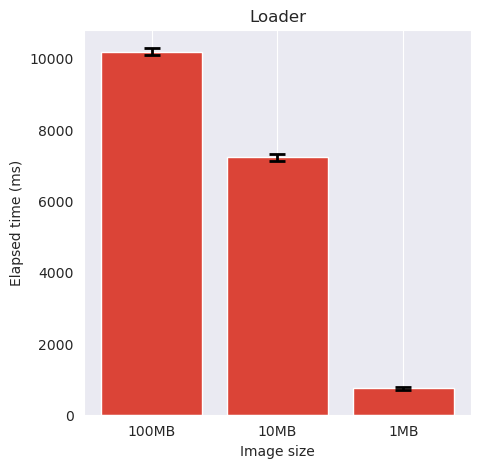

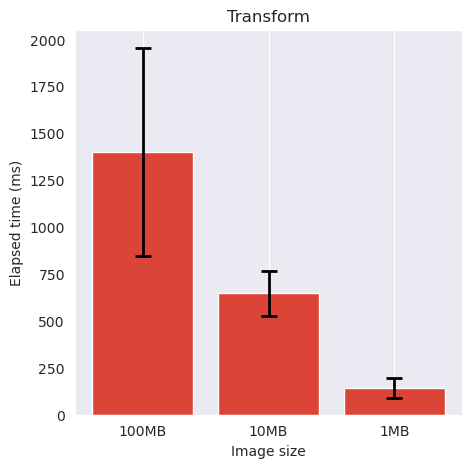

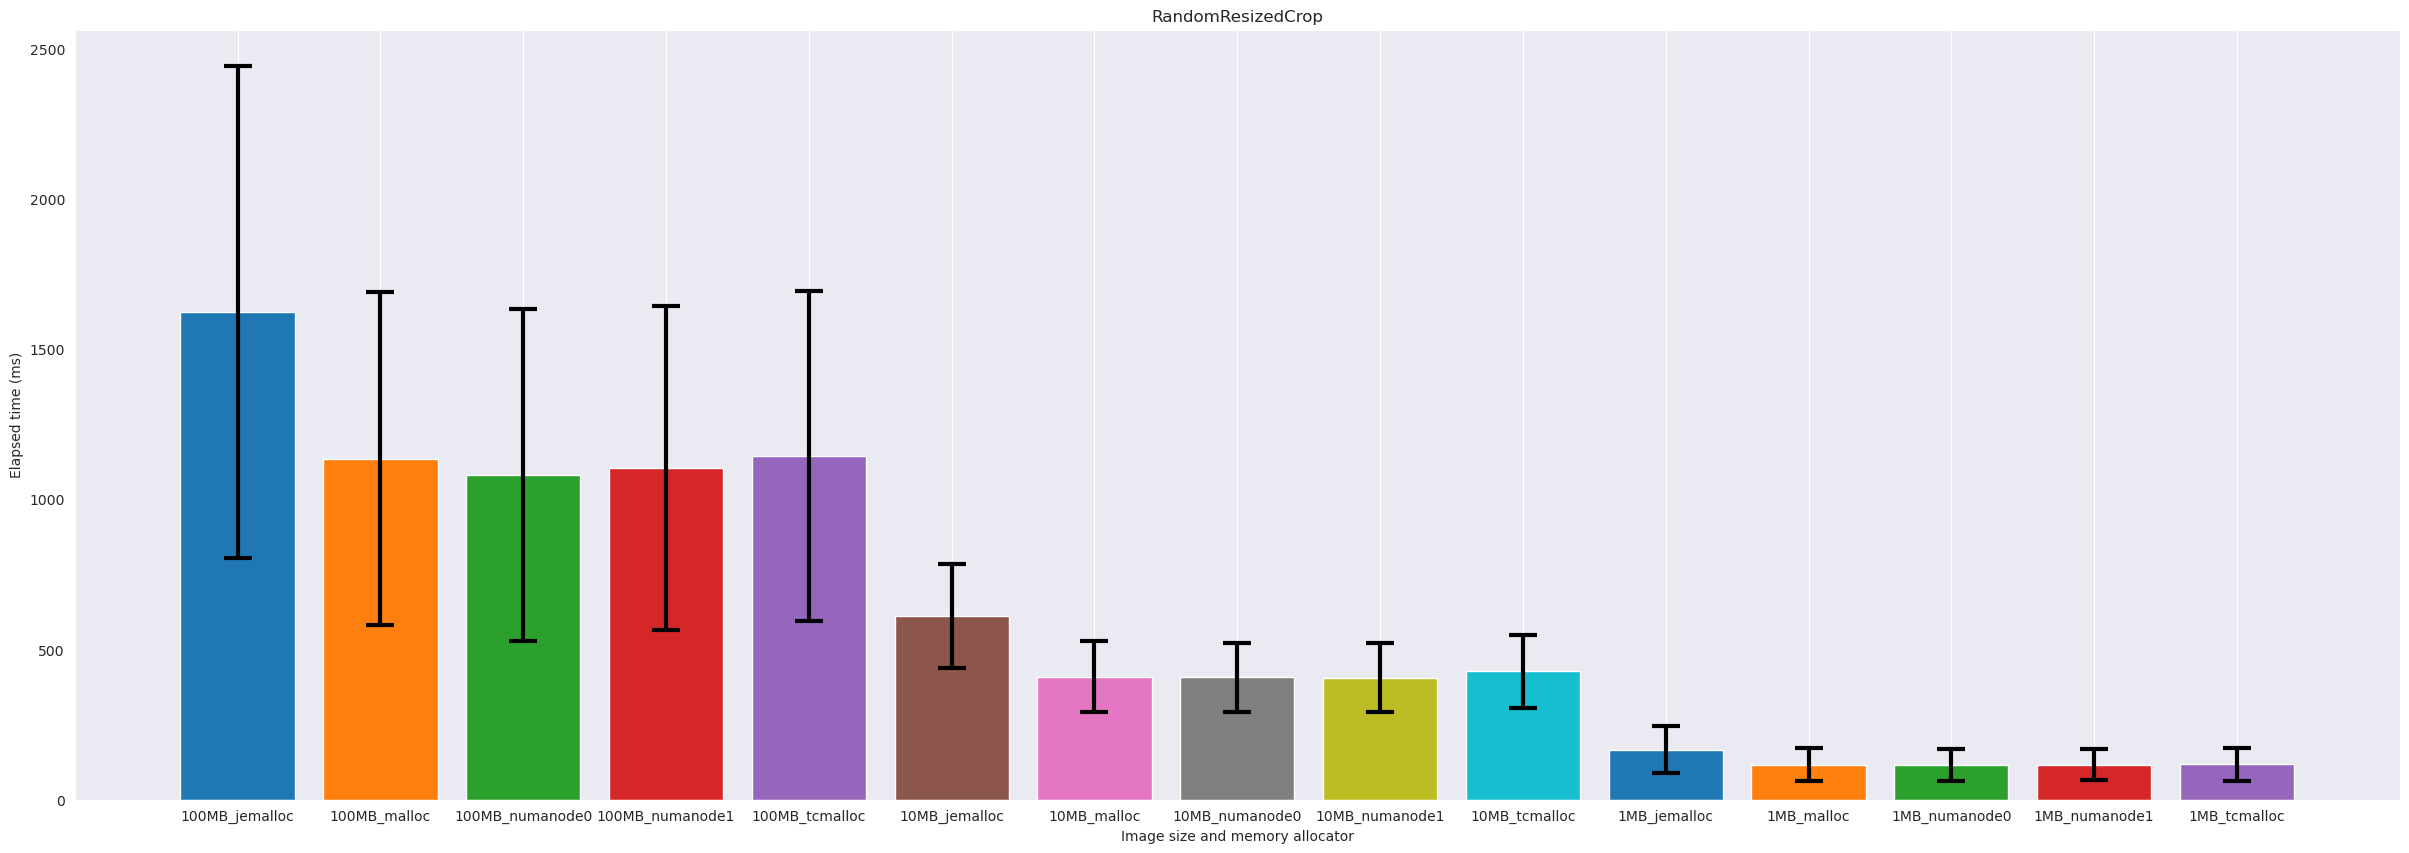

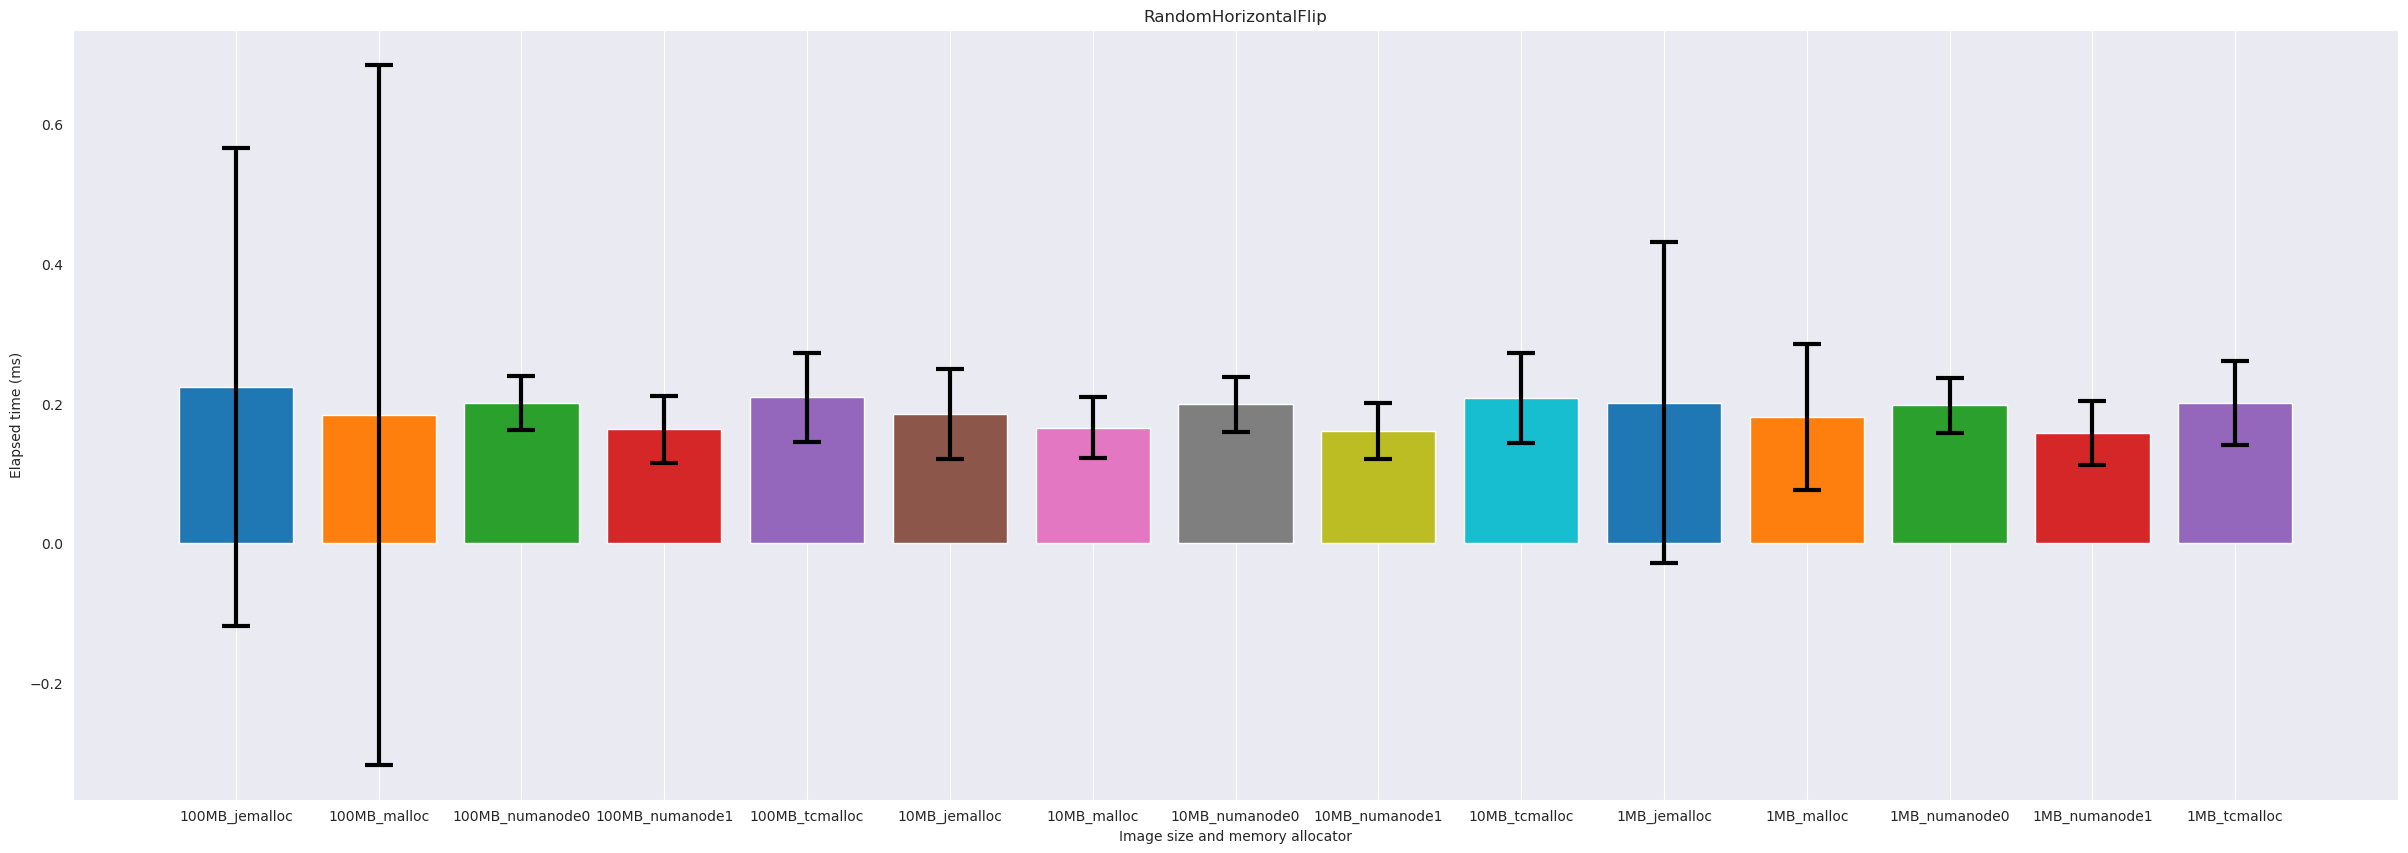

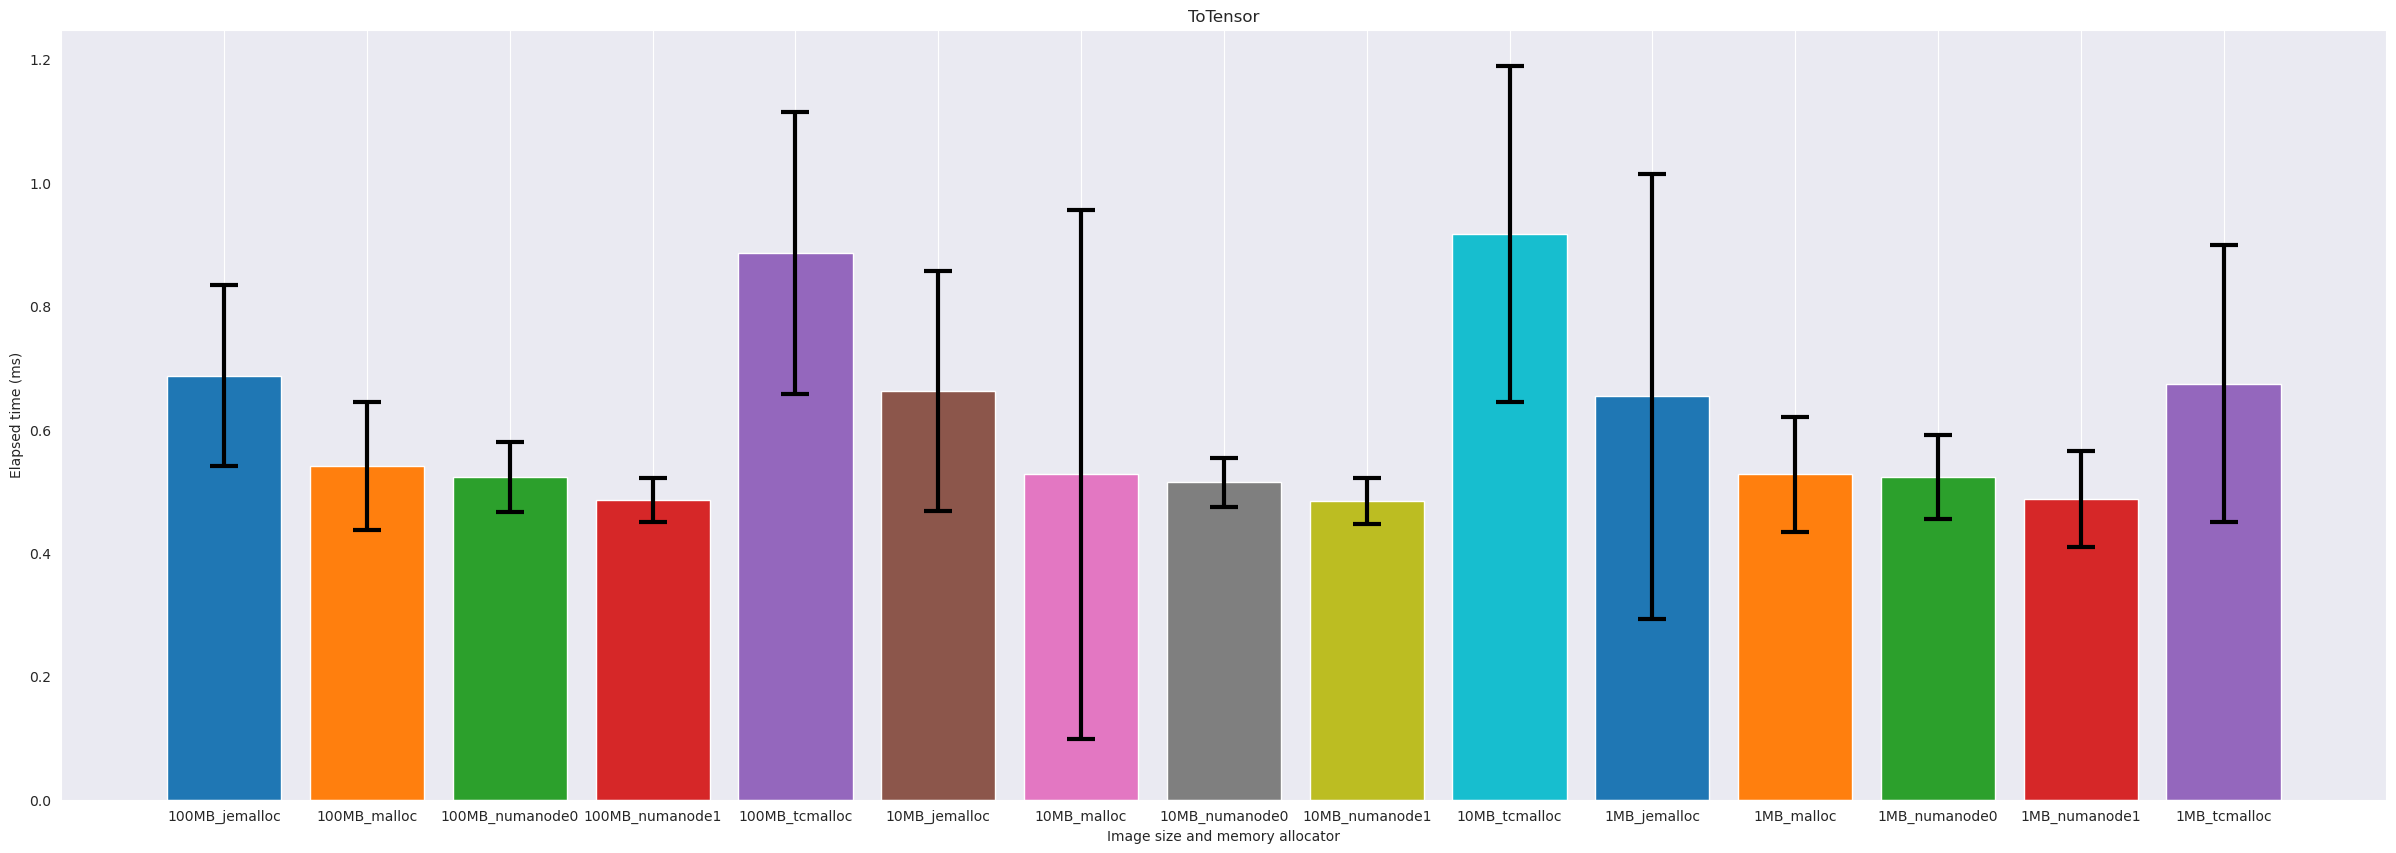

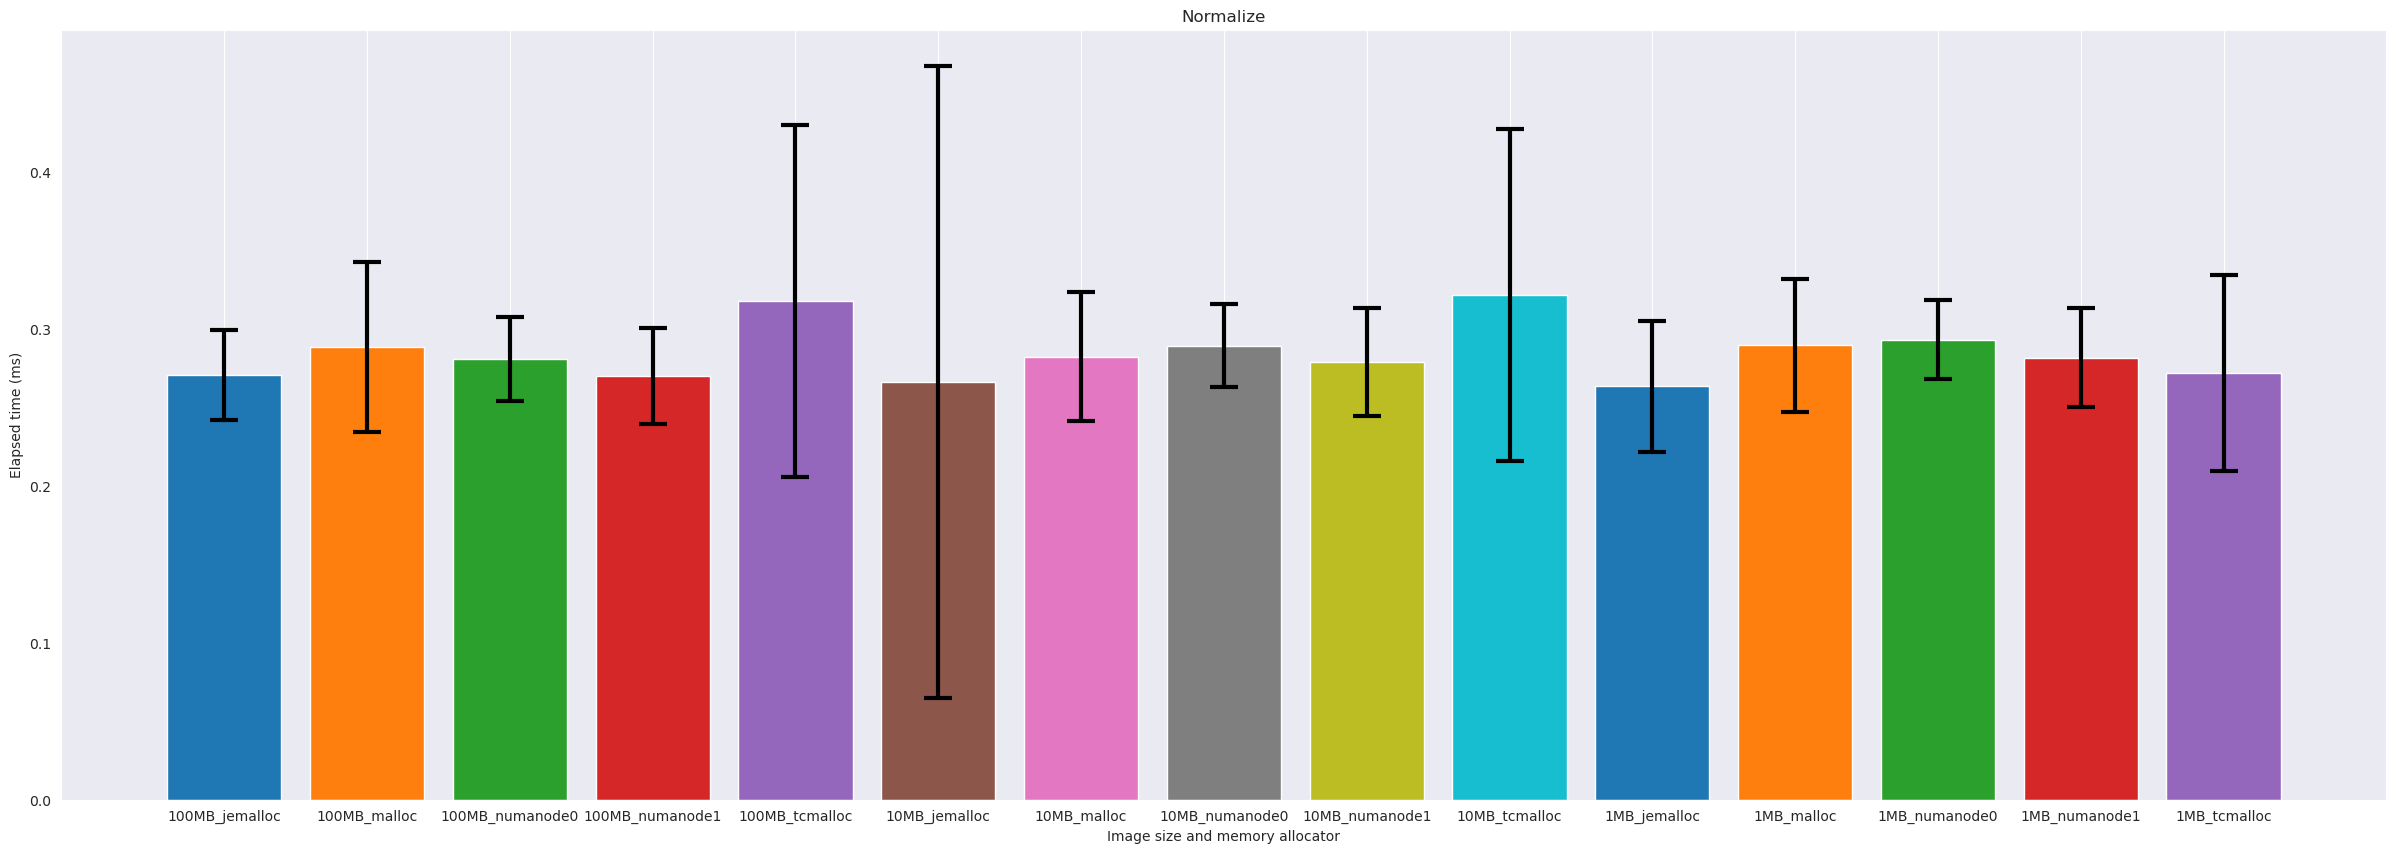

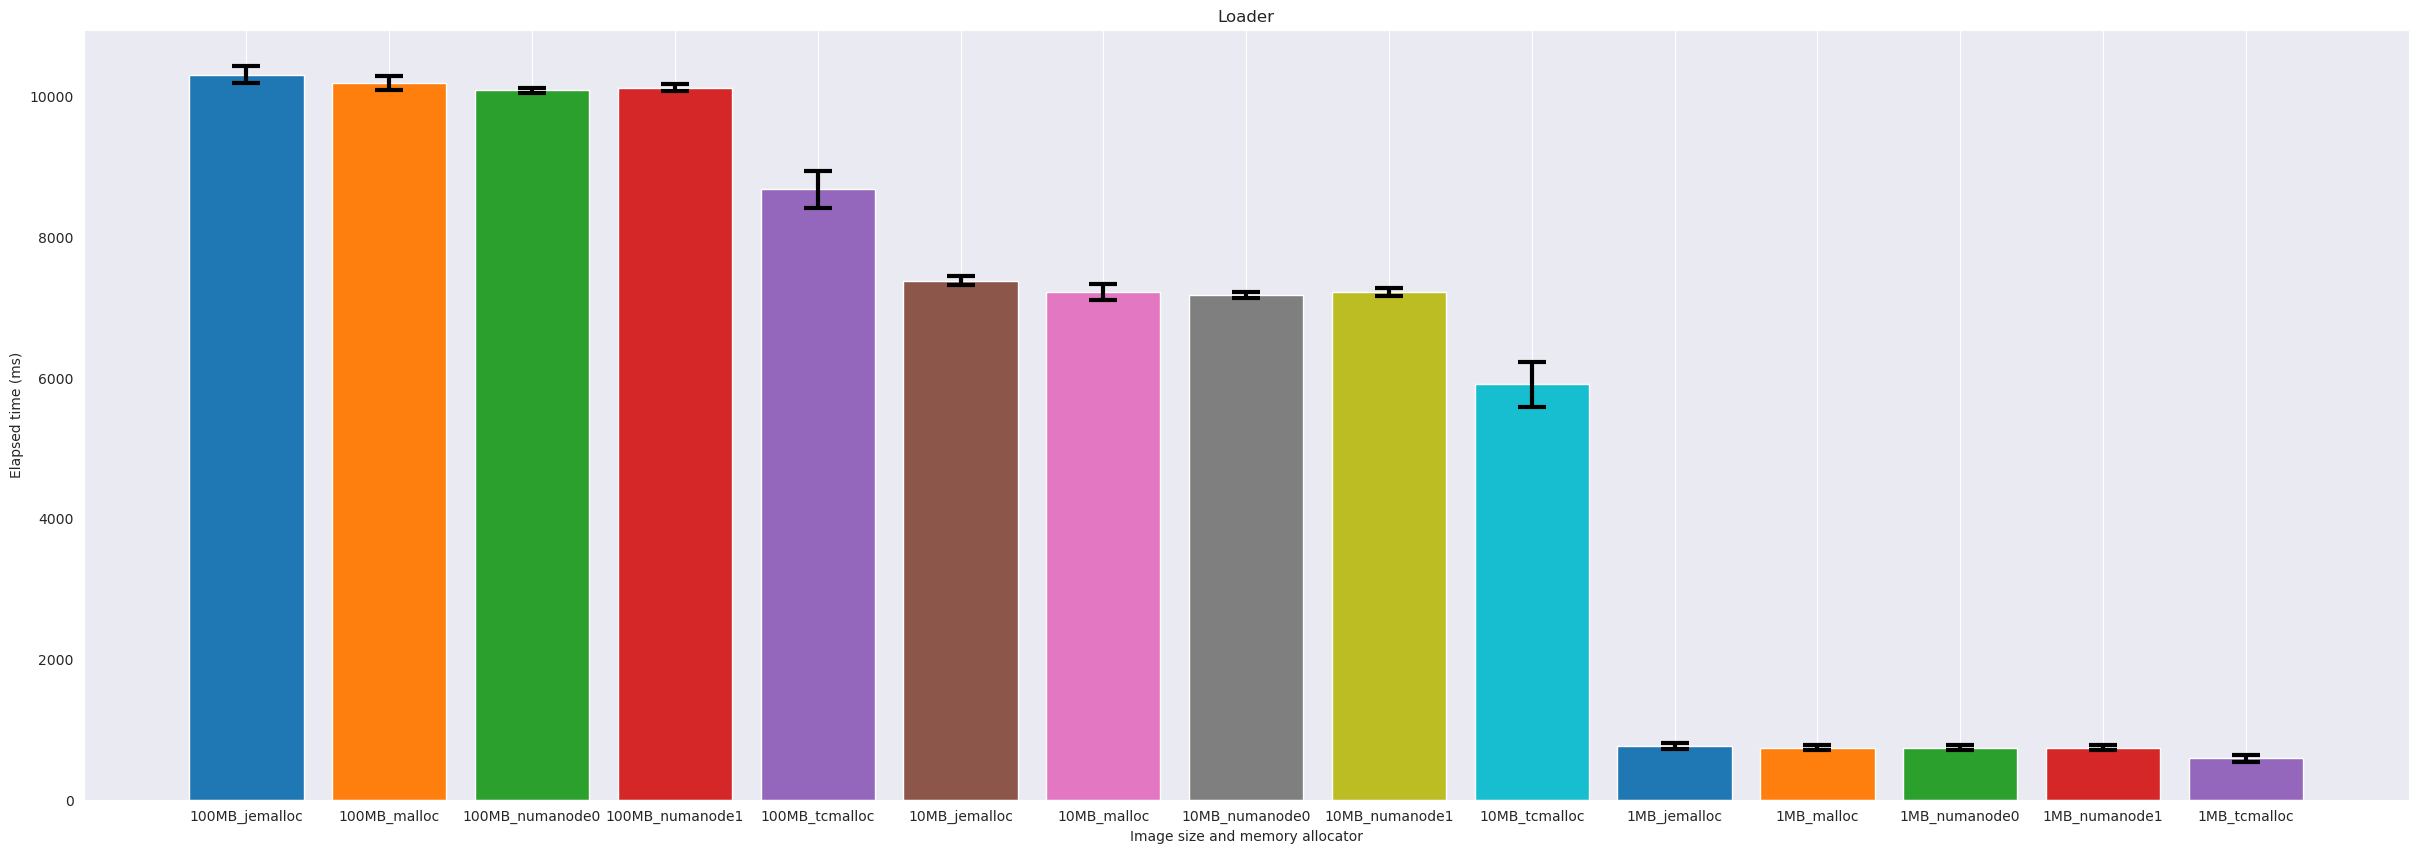

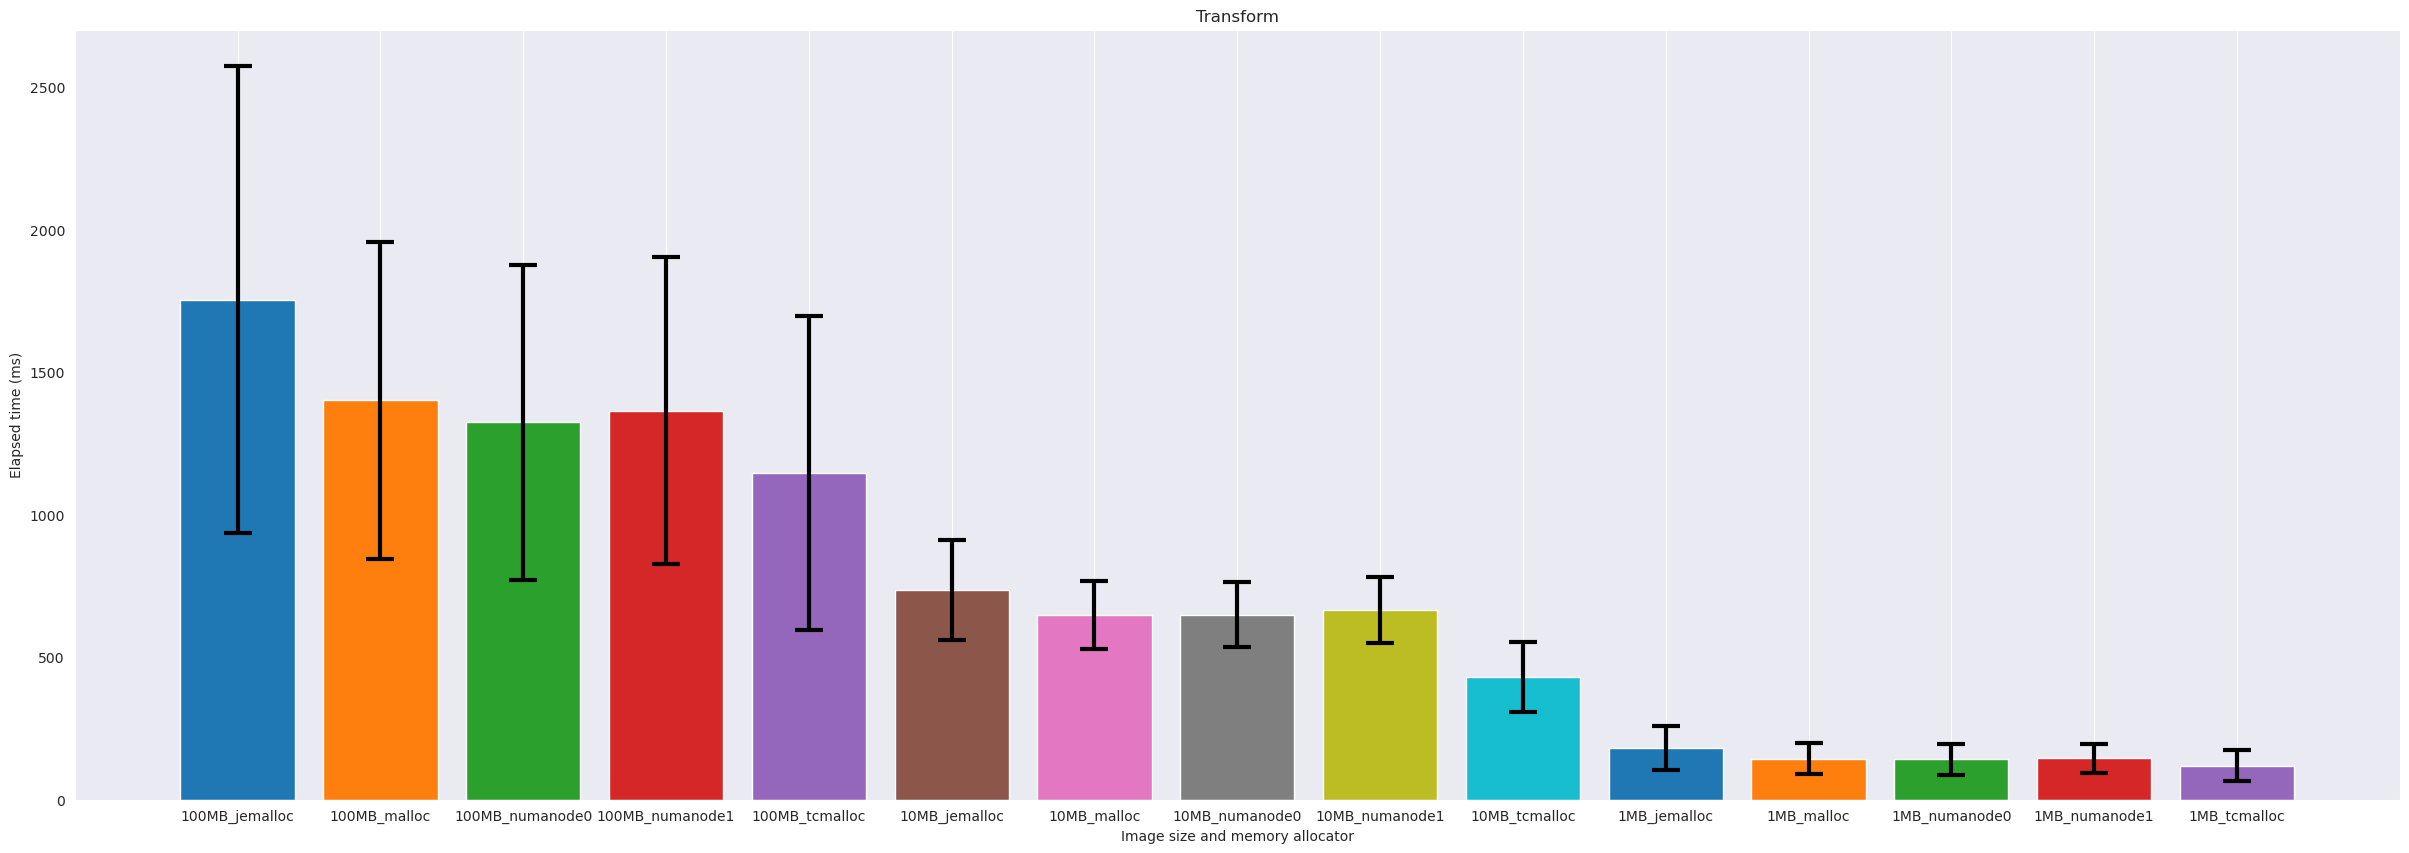

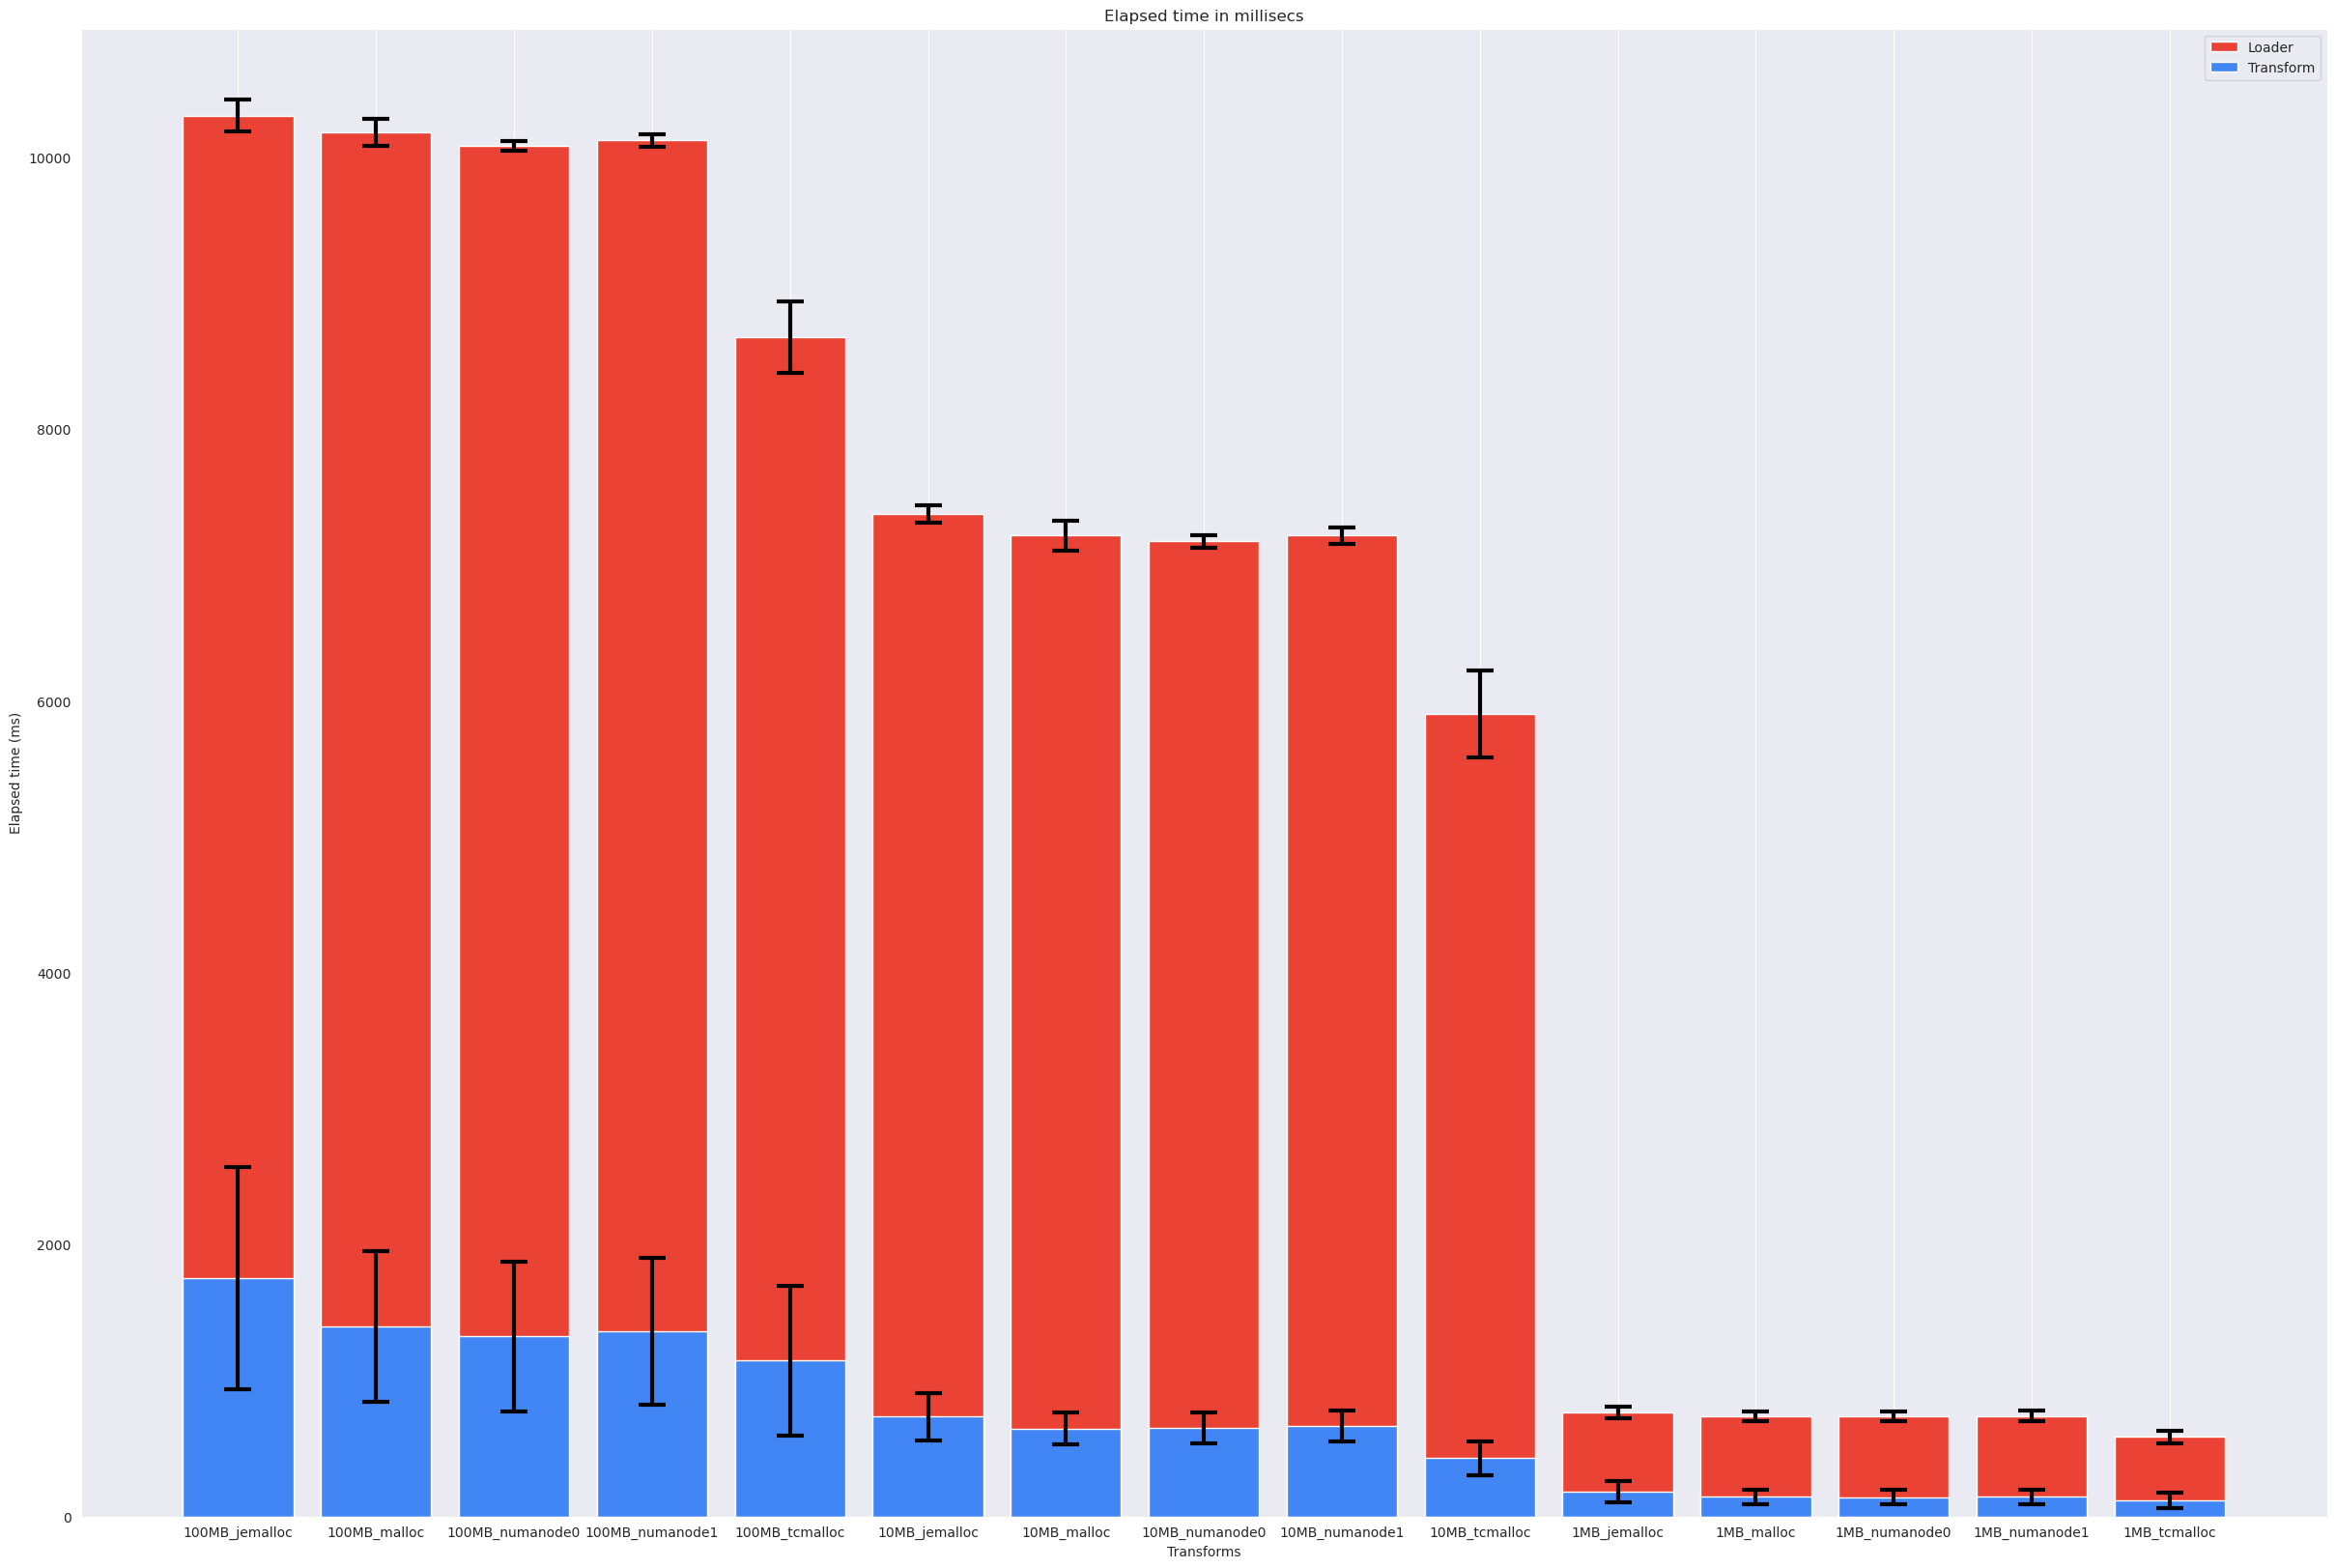

In [61]:

# for file in transforms:
#     plt.figure(figsize=(20,10))
#     plt.title(file)
#     plt.xlabel("Transforms")
#     plt.ylabel("Time (ms)")
#     plt.bar(transforms[file].keys(), [sum(transforms[file][t])/len(transforms[file][t])/1000000 for t in transforms[file]], yerr=[np.std(transforms[file][t])/1000000 for t in transforms[file]])
#     plt.show()

# # plot transforms in different files on same graph in different bars

for t in single_image_transforms[file]:

    plt.figure(figsize=(5,5))
    if t == 'loader':
        plt.title("Loader")
    elif t == 'transform':
        plt.title("Transform")
    else:
        plt.title(t)
    plt.xlabel("Image size")
    plt.ylabel("Elapsed time (ms)")
    for file in single_image_transforms:
        # split 'b128_gpu4_1MBeach_malloc' to get file size and memory allocator
        file_size,mem_alloc = file.split("_")[2].split("e")[0], file.split("_")[3].split(".")[0]
        if mem_alloc == 'malloc':
            # file_ = file_size + "_malloc"
            plt.bar(file_size, sum(single_image_transforms[file][t])/len(single_image_transforms[file][t])/1000000, yerr=np.std(single_image_transforms[file][t])/1000000,color='#DB4437',\
                    capsize=6,error_kw = {'elinewidth':2,'capthick':2})
    plt.grid(axis = 'y')
    plt.show()

for t in single_image_transforms[file]:

    plt.figure(figsize=(30,10))
    if t == 'loader':
        plt.title("Loader")
    elif t == 'transform':
        plt.title("Transform")
    else:
        plt.title(t)    
    plt.xlabel("Image size and memory allocator")
    plt.ylabel("Elapsed time (ms)")
    for file in single_image_transforms:
        # split 'b128_gpu4_1MBeach_malloc' to get file size and memory allocator
        file_size,mem_alloc = file.split("_")[2].split("e")[0], file.split("_")[3].split(".")[0]

        file_ = file_size + '_' + mem_alloc
        plt.bar(file_, sum(single_image_transforms[file][t])/len(single_image_transforms[file][t])/1000000, yerr=np.std(single_image_transforms[file][t])/1000000,capsize=10,error_kw = {'elinewidth':3,'capthick':3})
    plt.grid(axis = 'y')
    
    plt.show()

# plot a multibar graph with all transforms in different bars
plt.figure(figsize=(30,20))
plt.title("Elapsed time in millisecs")
plt.xlabel("Transforms")
plt.ylabel("Elapsed time (ms)")

for file in single_image_transforms:
    file_ = file.split("_")[2].split("e")[0] + "_" + file.split("_")[3].split(".")[0]
    ts = ['Loader', 'Transform']
    for t in ts:
        t = t.lower()
        plt.bar(file_, sum(single_image_transforms[file][t])/len(single_image_transforms[file][t])/1000000, yerr=np.std(single_image_transforms[file][t])/1000000, color='#4285f4' if t == 'transform' else '#ea4335',\
        capsize=10,error_kw = {'elinewidth':3,'capthick':3})
        # add legend
        plt.legend(ts)
plt.grid(axis = 'y')
      
plt.show()

